This notebook covers **Task 2 - Data Preparation and Analysis**. We will use all of the JSON data collected during Task 1 to perform the analysis process.


In [1]:
import json
import urllib
from pathlib import Path
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from collections import OrderedDict
import numpy as np
import glob

In [2]:
#Directories for raw storage 
dir_raw = Path("raw")
# directory for storing clean pre-processed data
dir_data = Path("data")

# make sure it exists
dir_raw.mkdir(parents=True, exist_ok=True)

## Data Parsing and Merging
A function for converting our data into a dataframe with the information we want to analyse.

In [3]:
#takes in a file path , reads the file and returns data inside
def parse_raw_data(f_path):
    fin = open(f_path, "r")
    jdata = fin.read()
    
    data = json.loads(jdata)
    return data

In [4]:
#takes in list of races for a particular year , gets the data we need from that year returns it as a dataframe
def convert_yearly_races_data_into_df(races):
    rows = []
    
    for race_dict in races:
        circuitinfo = race_dict["Circuit"]
        results = race_dict["Results"]
        driverinfo = results[0]["Driver"]
        constructorinfo = results[0]["Constructor"]
        
        
        row = {"Season":race_dict["season"]}
        row["Race_name"] = race_dict["raceName"]
        row["Circuit_name"] = circuitinfo["circuitName"]
        row["Circuit_location"] = circuitinfo["circuitName"]
        row["Race_date"] = race_dict["date"]
        row["Winner"] = driverinfo["givenName"]+" "+driverinfo["familyName"]
        row["Driver_nationality"] = driverinfo["nationality"]
        row["Constructor_Name"] = constructorinfo["name"]
        row["Constructor_Nationality"] = constructorinfo["nationality"]
        rows.append(row)
    return pd.DataFrame(rows)




## Data Verification 
No need to verify the data as there are no null / empty values

In [5]:
race_year = 2000
dict_of_race_winners = {}
#send in a file path , we get data from that path(as a list) 
all_race_data = parse_raw_data("all_results.json")

#iterate through list with each index as a year of races

while race_year < 2023:
    yearly_list = [] 
    
    for x in all_race_data:  
        if x.get("season") == str(race_year):   
            race_dic = {}
            race_dic["Year"] = race_year
            race_dic["Round"] = x.get("round")
            race_dic["Country"] = x.get("Circuit").get("Location").get("country")
            race_dic["Race Name"] = x.get("raceName")            
            race_dic["Winner"] = f'{x.get("Results")[0].get("Driver").get("givenName")} {x.get("Results")[0].get("Driver").get("familyName")}'
            race_dic["Constructor"] = x.get("Results")[0].get("Constructor").get("name")
            race_dic["Constructor Nationality"] = x.get("Results")[0].get("Constructor").get("nationality")
            
            yearly_list.append(race_dic)
    dict_of_race_winners[str(race_year)] = yearly_list
        
    race_year += 1
  
    
          
    #dict_of_race_winners[x.get("season")] = x.get("Results")[0]
    #dict_o

In [6]:
pd.DataFrame(dict_of_race_winners["2020"])



,Year,Round,Country,Race Name,Winner,Constructor,Constructor Nationality
0,2020,1,Austria,Austrian Grand Prix,Valtteri Bottas,Mercedes,German
1,2020,2,Austria,Styrian Grand Prix,Lewis Hamilton,Mercedes,German
2,2020,1,Austria,Austrian Grand Prix,Valtteri Bottas,Mercedes,German
3,2020,2,Austria,Styrian Grand Prix,Lewis Hamilton,Mercedes,German


Data Analysis 

## Drivers with most wins 

To get the driver with the most wins, I wil first get a list of all the drivers that have raced from 2000 to 2022


In [6]:
winners = [] # List will contain the winners of all the races from 2000-2022
for x in all_race_data:
    winners.append(f'{x.get("Results")[0].get("Driver").get("givenName")} {x.get("Results")[0].get("Driver").get("familyName")}')
    
drivers = set(winners) # All drivers that have ever won arace in the time range given


I will then define a function that get the number of race wins that all the drivers that have won a race have

In [7]:
def get_race_wins(drivers):
    wins_dic = {}
    for driver in drivers:      

        wins_dic[driver] = winners.count(driver)

    wins_dic = sorted(wins_dic.items(), key=lambda x:x[1], reverse=True)
    
    return wins_dic
        

        

In [32]:
pd.DataFrame(get_race_wins(drivers)).head(10)





,0,1
0,Lewis Hamilton,7
1,Sebastian Vettel,7
2,Michael Schumacher,7
3,Fernando Alonso,5
4,Jenson Button,4
5,Kimi Räikkönen,4
6,Nico Rosberg,3
7,Max Verstappen,2
8,Valtteri Bottas,2
9,Giancarlo Fisichella,2


In the above dataframe the First column represents the driver names and the second one represents their number of wins

/tmp/ipykernel_21782/3263722085.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


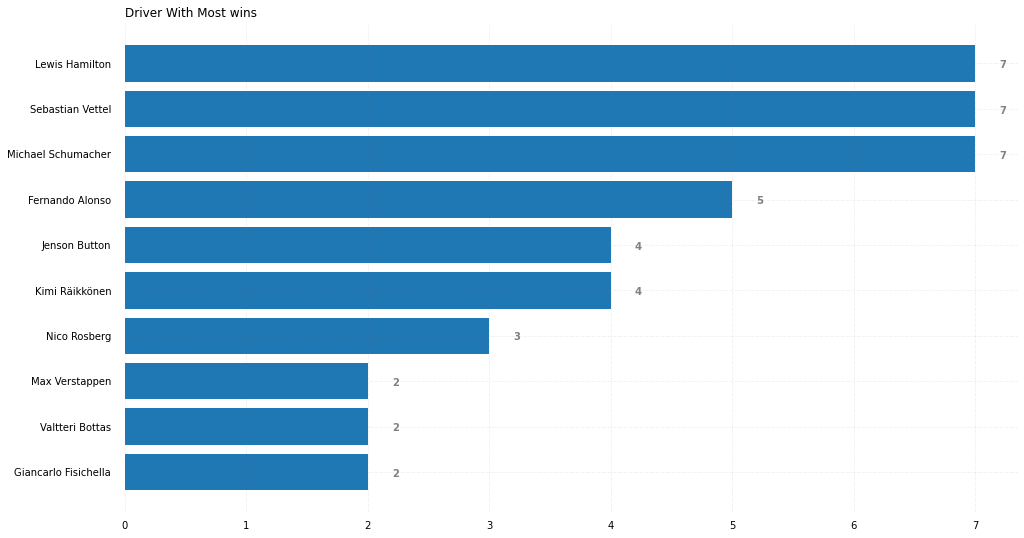

In [9]:

df = pd.DataFrame(get_race_wins(drivers)).head(10)
 
driver = df[0].head(12)
wins = df[1].head(12)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(driver, wins)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Driver With Most wins',
             loc ='left', )
 

 
# Show Plot
plt.show()

### Constructor with the most wins


In [11]:
winners = [] # This list will consist of all the races and the constructors whose drivers won from the year 2000- 2022
for x in all_race_data:
    winners.append(x.get("Results")[0].get("Constructor").get("name"))
    
constructors = set(winners) # All constructors whose drivers have won a race race in the time range given

In [12]:
pd.DataFrame(get_race_wins(constructors)).head(10)

,0,1
0,Ferrari,39
1,Mercedes,22
2,McLaren,14
3,Red Bull,10
4,Renault,10
5,Brawn,4
6,Williams,3
7,Lotus F1,2


/tmp/ipykernel_20472/2633101766.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


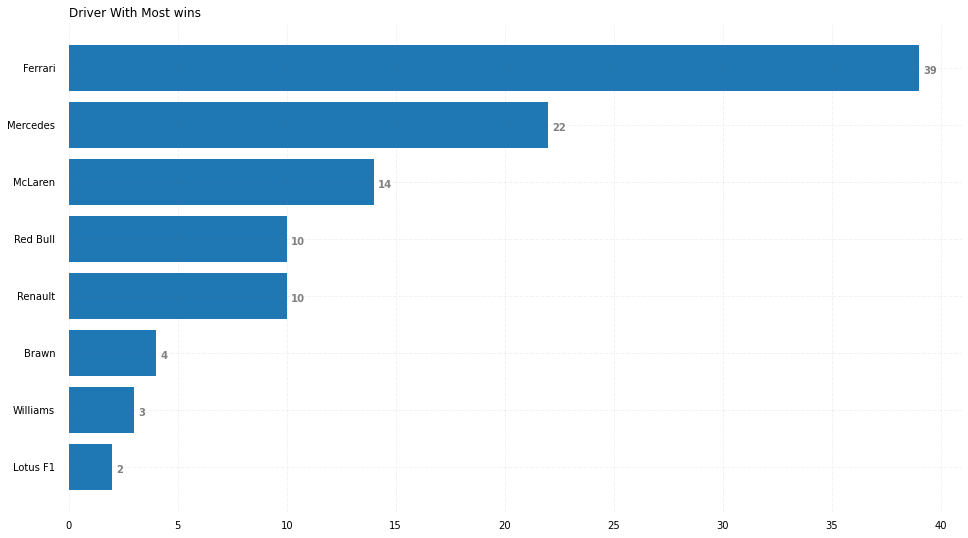

In [14]:
df = pd.DataFrame(get_race_wins(constructors)).head(10)
 
driver = df[0].head(12)
wins = df[1].head(12)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(driver, wins)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Driver With Most wins',
             loc ='left', )
 

 
# Show Plot
plt.show()

### Wins by Lewis Hamilton between 2000 to 2022

In [15]:
# total number of races between 2000-2022
all_races = len(all_race_data)
#all races won by Lewis hamilton between 2000-2022
winners = [] # List will contain the winners of all the races from 2000-2022
for x in all_race_data:
    winners.append(f'{x.get("Results")[0].get("Driver").get("givenName")} {x.get("Results")[0].get("Driver").get("familyName")}')
hamilton_wins = winners.count("Lewis Hamilton")
hamilton_wins

14

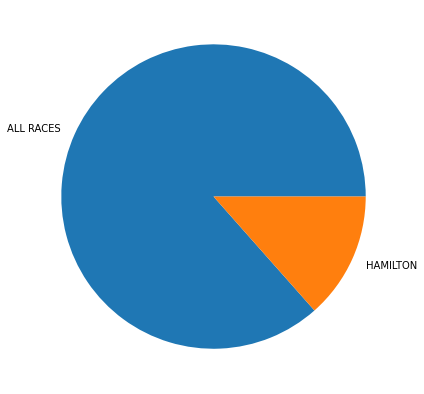

In [16]:
names = ['ALL RACES', 'HAMILTON']
 
data = [all_races - hamilton_wins, hamilton_wins]
 
# Creating plot
fig = plt.figure(figsize =(12, 7))
plt.pie(data, labels = names)
 
# show plot
plt.show()

### Races won by Michael Schumacher, Max Verstappen and Lewis Hamiston
This compares the number of races won the the top 3 drivers between 2000 and 2022.


In [17]:
winners = [] # List will contain the winners of all the races from 2000-2022
for x in all_race_data:
    winners.append(f'{x.get("Results")[0].get("Driver").get("givenName")} {x.get("Results")[0].get("Driver").get("familyName")}')
hamilton_wins = winners.count("Lewis Hamilton")
schumacher_wins = winners.count("Michael Schumacher")
verstappen_wins = winners.count("Max Verstappen")

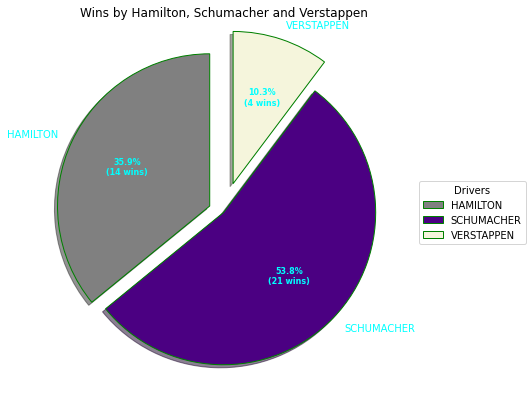

In [19]:
names = ['HAMILTON', 'SCHUMACHER', 'VERSTAPPEN']
 
data = [hamilton_wins, schumacher_wins, verstappen_wins]
 
 
 
# Creating explode data
explode = (0.1, 0.0, 0.2)
 
# Creating color parameters
colors = ("grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} wins)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = names,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="cyan"))
 
# Adding legend
ax.legend(wedges, names,
          title ="Drivers",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Wins by Hamilton, Schumacher and Verstappen")
 
# show plot
plt.show()

### Constructor wins in their home country
This analyses the probabilty of a constructor to win a race in their own Country

In [21]:
#Loop through the list of winners to find out all the constructors that have won races since 2000.
constructor_wins_dic = {}# This dictionary will contain winning constuctors and whether the races were won in their home country or away
for elem in constructors:  
    constructor = elem
    
    home_win = [] # This list will contain the wins that the constructor had in their country
    away_win = [] # This list will contain the wins that the constructor had outside their country

    for elem in dict_of_race_winners:
        year = (dict_of_race_winners.get(elem))
        for elem in year:
            if elem.get("Constructor") == constructor:
                if elem.get("Country")[:4] == elem.get("Constructor Nationality")[:4]:
                    home_win.append("1")
         
                   
                else:
                    away_win.append("2")
    constructor_wins_dic[constructor] = {"home": len(home_win),
                                         "away": len(away_win)}
  

    
        

In [22]:
pd.DataFrame(constructor_wins_dic)

,Red Bull,Brawn,Renault,Williams,Lotus F1,McLaren,Ferrari,Mercedes
home,2,0,0,0,0,0,0,0
away,8,4,10,3,2,14,39,22


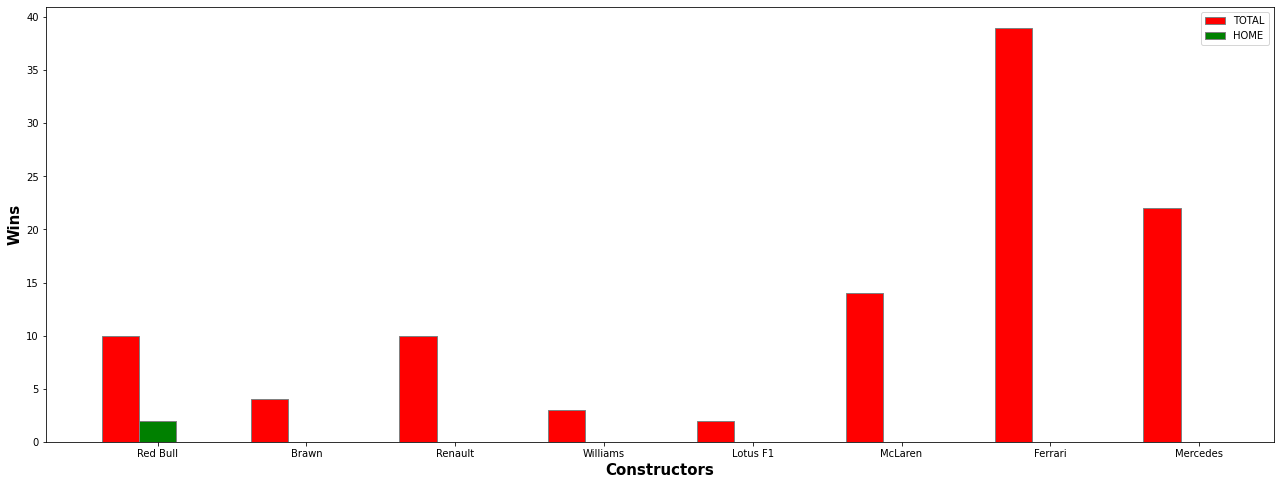

In [23]:

 
constructors = [elem for elem in constructor_wins_dic]


# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(22, 8))
 
# set height of bar
HOME = [constructor_wins_dic.get(elem).get("home") for elem in constructor_wins_dic]
TOTAL = [constructor_wins_dic.get(elem).get("home") + constructor_wins_dic.get(elem).get("away") for elem in constructor_wins_dic]

 
# Set position of bar on X axis
br1 = np.arange(len(TOTAL))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, TOTAL, color ='r', width = barWidth,
        edgecolor ='grey', label ='TOTAL')
plt.bar(br2, HOME, color ='g', width = barWidth,
        edgecolor ='grey', label ='HOME')

 
# Adding Xticks
plt.xlabel('Constructors', fontweight ='bold', fontsize = 15)
plt.ylabel('Wins', fontweight ='bold', fontsize = 15)

plt.xticks([r + barWidth for r in range(len(TOTAL))],
        constructors)
 
plt.legend()
plt.show()

### Average finishing position of drivers in 2022


In [24]:
selected_year = 2022
total_appearances = []
drivers2022 = [] #Drivers who raced in 2022
year_dic = {}
for x in parse_raw_data("all_results.json"):  
    if x.get("season") == str(selected_year):
        results = x.get("Results")
        round = x.get("round")
        dic = {}
        for elem in results:   
            driver_full_name = f'{elem.get("Driver").get("givenName")} {elem.get("Driver").get("familyName")}'
            dic[driver_full_name] = elem.get("position")
            if drivers2022.count(driver_full_name) == 0:
                drivers2022.append(driver_full_name)
        year_dic[round] = dic

            

Now that I have a list of all the drivers who raced in 2022 and a dictionary with all the results, I can create a function to calcuate the average finishing position of each driver.

In [27]:
def get_average_finishing_position(drivers2022, year_dic):
    average_finish_positions = {}
    for driver in drivers2022:
        positions = []
        
        for elem in year_dic:
            round_ = year_dic.get(elem)
            for elem in round_:
                if elem == driver:
                    positions.append(round_.get(elem))
        average_finish = sum(int(elem) for elem in positions)/ len(positions)
        average_finish_positions[driver] = average_finish
    average_finish_positions = sorted(average_finish_positions.items(), key=lambda x:x[1])
    return average_finish_positions

In [28]:
pd.DataFrame(get_average_finishing_position(drivers2022, year_dic))

,0,1
0,Charles Leclerc,1.5
1,Carlos Sainz,2.5
2,George Russell,4.5
3,Valtteri Bottas,6.0
4,Lewis Hamilton,6.5
5,Esteban Ocon,6.5
6,Kevin Magnussen,7.0
7,Yuki Tsunoda,8.0
8,Fernando Alonso,9.0
9,Guanyu Zhou,10.0


/tmp/ipykernel_20472/859342568.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


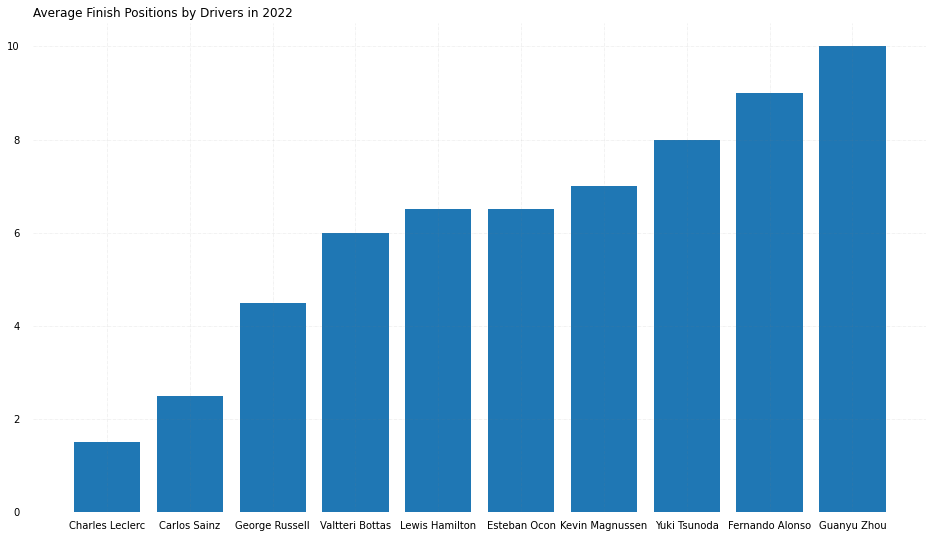

In [29]:
df = pd.DataFrame(get_average_finishing_position(drivers2022, year_dic)).head(10)
 
driver = df[0].head(12)
finish = df[1].head(12)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.bar(driver, finish)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
#ax.invert_yaxis()
 
 
# Add Plot Title
ax.set_title('Average Finish Positions by Drivers in 2022',
             loc ='left', )
 

 
# Show Plot
plt.show()

### Driver experience for the past 22 years
This analysis aims to find out the experience F! drivers have gained in the past 22years by looking at how many races they have participated in the range of time

In [30]:
# Get all drivers who participated in races since 2000
selected_year = 2000
total_appearances = []
drivers = [] #Drivers who raced between 2000 and 2022
all_time_dic = {}
for x in parse_raw_data("all_results.json"):
            results = x.get("Results")
            round_ = x.get("round")
       
            dic = {}
            for elem in results:   
                driver_full_name = f'{elem.get("Driver").get("givenName")} {elem.get("Driver").get("familyName")}'
        
                dic[driver_full_name] = round_
           
                if drivers.count(driver_full_name) == 0:
                    drivers.append(driver_full_name)
            all_time_dic[f"{x.get('season')} {round_}"] = dic
  

In [31]:
def get_total_appearances(drivers, all_time_dic):
    total_appearances = {}
    for driver in drivers:
        positions = []        
        for elem in all_time_dic:
            round_ = all_time_dic.get(elem)
            for elem in round_:
                if elem == driver:
                    positions.append(round_.get(elem))
        appearances =  len(positions)
        total_appearances[driver] = appearances
    total_appearances = sorted(total_appearances.items(), key=lambda x:x[1], reverse=True)
    return total_appearances

In [32]:
pd.DataFrame(get_total_appearances(drivers, all_time_dic)).head(10)

,0,1
0,Lewis Hamilton,31
1,Fernando Alonso,30
2,Kimi Räikkönen,29
3,Felipe Massa,27
4,Jenson Button,26
5,Sebastian Vettel,21
6,Jarno Trulli,20
7,Nick Heidfeld,18
8,Michael Schumacher,17
9,Mark Webber,17


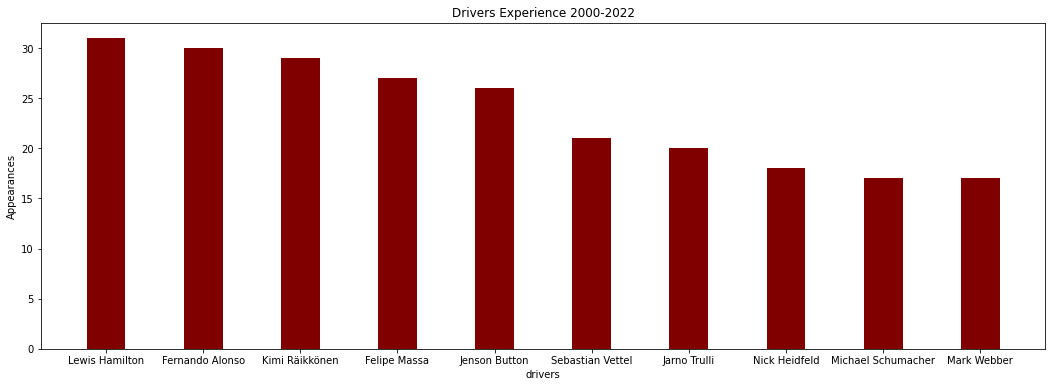

In [287]:


# creating the dataset
df = pd.DataFrame(get_total_appearances(drivers, all_time_dic)).head(10)
 
drivers = df[0].head(10)
appearances = df[1].head(12)
  
fig = plt.figure(figsize = (18, 6))
 
# creating the bar plot
plt.bar(drivers, appearances, color ='maroon',
        width = 0.4)
 
plt.xlabel("drivers")
plt.ylabel("Appearances")
plt.title("Drivers Experience 2000-2022")
plt.show()

### Discussion and Conclusion
##### Challenges faced during data extraction.
When collecting the data from my chosen public API the main challenge was page size limits. Tha data could have been collected fatster had there not been limits to the size of data that could be accesses by one call. Aside that, The documetation of the public API is not picture perfect and the developer in some cases has to figure out things on his own that would have been easily been included in the documentation to facility seamess API experince.

##### Insight gained from analysis
The Main insight gained from the analysis of F1 one data is how the spoer has developed with time since its inception in the year 1950 to date. The sport has also become safer with the years with reduced accidents and therefore became more popular and consequentl increasing the number of events per year.

##### Further analysis
The data from the API has a lot of data ponts on F1 statistics which can be subjected to more analysis. A few analyses that can be perfomed include; -Average age of drivers per year - Pole positions and pole+wins per driver